In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [3]:
l3T = pd.read_csv('../data/l3T.csv')
l3T.head()

l3_forest = l3T.copy()

l3_forest = pd.get_dummies(l3_forest, columns=['host', 'clientIp'])

l3_forest

,timestamp_min,timestamp_max,time_active,count,host_www.81ki.de,host_www.9h7u.de,host_www.Qxcs.de,host_www.RYkk.de,host_www.bsaD.de,clientIp_10.120.85.11,...,clientIp_99.122.247.18,clientIp_99.148.233.47,clientIp_99.163.250.173,clientIp_99.189.223.188,clientIp_99.19.212.11,clientIp_99.212.231.183,clientIp_99.220.3.75,clientIp_99.240.214.135,clientIp_99.244.5.77,clientIp_99.43.86.162
0,100723,399334,298611,1086,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,100189,399245,299056,904,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100345,399968,299623,739,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,100131,399897,299766,806,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100113,399893,299780,833,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,100176,399386,299210,776,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2516,100134,399973,299839,2006,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2517,100050,399621,299571,2070,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2518,33662,133295,99633,415,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
features = l3_forest
features = features.fillna(0)

features_scaled = scaler.fit_transform(features)

clf = IsolationForest(contamination=0.1, random_state=42, warm_start=True)
clf.fit(features_scaled)

l3_forest['anomaly'] = clf.predict(features_scaled)  # -1: Anomalie, 1: Normal
l3_forest['anomaly_score'] = clf.decision_function(features_scaled)

# Ergebnisse anzeigen
l3_forest

,timestamp_min,timestamp_max,time_active,count,host_www.81ki.de,host_www.9h7u.de,host_www.Qxcs.de,host_www.RYkk.de,host_www.bsaD.de,clientIp_10.120.85.11,...,clientIp_99.163.250.173,clientIp_99.189.223.188,clientIp_99.19.212.11,clientIp_99.212.231.183,clientIp_99.220.3.75,clientIp_99.240.214.135,clientIp_99.244.5.77,clientIp_99.43.86.162,anomaly,anomaly_score
0,100723,399334,298611,1086,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,1,0.000454
1,100189,399245,299056,904,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,1,0.006180
2,100345,399968,299623,739,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,-1,-0.002328
3,100131,399897,299766,806,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,1,0.006180
4,100113,399893,299780,833,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,1,0.002975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,100176,399386,299210,776,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,0.002717
2516,100134,399973,299839,2006,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1,-0.006843
2517,100050,399621,299571,2070,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1,-0.006843
2518,33662,133295,99633,415,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1,-0.011167


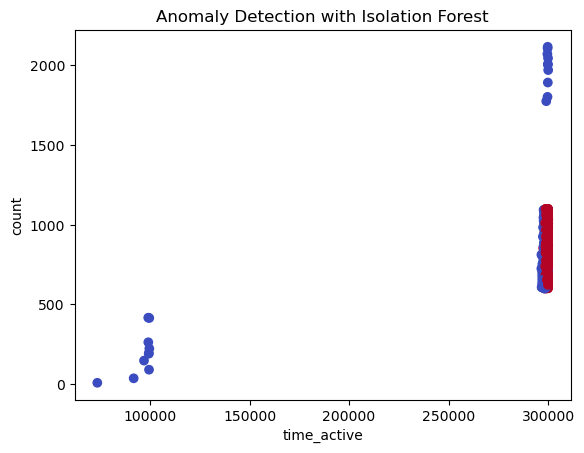

In [9]:
plt.scatter(features['time_active'], features['count'], c=l3_forest['anomaly'], cmap='coolwarm')
plt.xlabel('time_active')
plt.ylabel('count')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

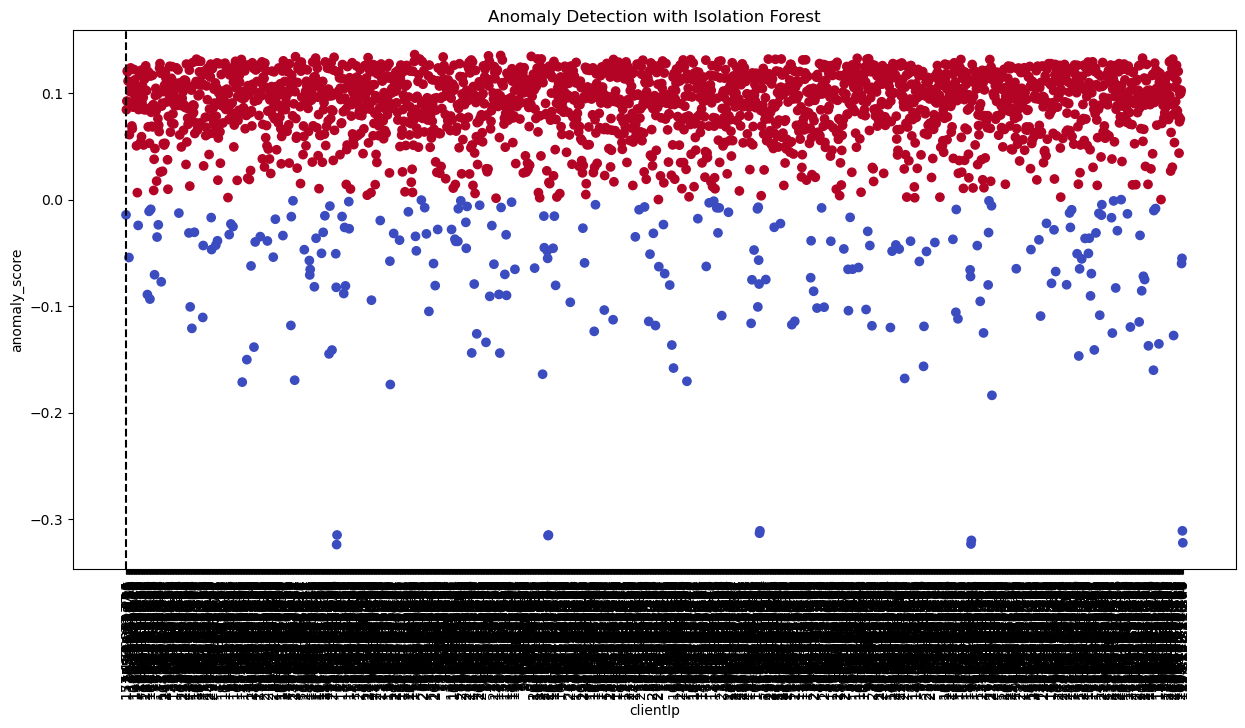

In [6]:
plt.figure(figsize=(15,7))

plt.scatter(l3_forest['clientIp'], l3_forest['anomaly_score'], c=l3_forest['anomaly'], cmap='coolwarm')

plt.xlabel('clientIp')
plt.ylabel('anomaly_score')
plt.title('Anomaly Detection with Isolation Forest')

plt.xticks(rotation=90)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [7]:
client_ratings = pd.DataFrame({
    'clientId': [],
    'anomaly_median': [],
    'mean_anomaly_score': []
})

for client in l3_forest['clientIp'].unique():
    l3_forest_filtered = l3_forest[l3_forest['clientIp'] == client]
    line = {
        'clientId': client,
        'anomaly_median': l3_forest_filtered['anomaly'].median(),
        'mean_anomaly_score': l3_forest_filtered['anomaly_score'].mean()
    }
    client_ratings.loc[len(client_ratings)] = line
    
client_ratings
    

,clientId,anomaly_median,mean_anomaly_score
0,122.68.77.4,-1.0,-0.014355
1,177.173.252.191,1.0,0.084439
2,151.173.203.216,1.0,0.092542
3,155.98.13.174,1.0,0.120793
4,177.64.13.218,1.0,0.120092
...,...,...,...
2515,117.192.188.19,1.0,0.102633
2516,252.112.151.96,-1.0,-0.060020
2517,144.188.250.74,-1.0,-0.055186
2518,192.222.234.204,-1.0,-0.311126


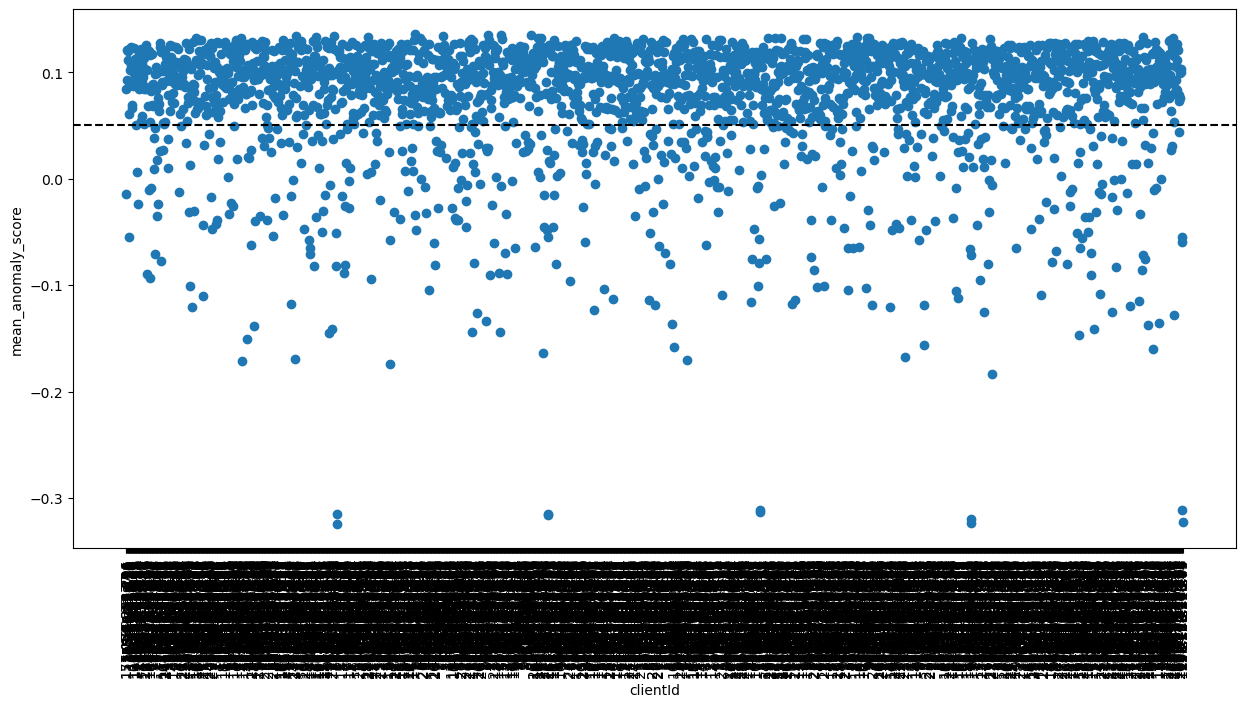

In [8]:
plt.figure(figsize=(15,7))

plt.scatter(client_ratings['clientId'], client_ratings['mean_anomaly_score'])

plt.xlabel('clientId')
plt.ylabel('mean_anomaly_score')
plt.xticks(rotation=90)
plt.axhline(0.05, color='black', linestyle='--')
plt.show()